In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import re
from operator import itemgetter
from collections import Counter
from functions import progressbar, filter_df, student_scores, unique_students, print_df

In [114]:
# print full dataframe
def print_df(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', 20, 'display.width', 150):
        print(df)

In [115]:
# find all directories with files in them and only append a2016
paths = []
for tuple in os.walk(os.getcwd()):
    for item in tuple:
        if type(item) == str and re.search('Z.*Z[0-9]$', item):
            directories = re.findall('[A|B].*', item)
            for directory in directories:
                if type(directory) == str:
                    path = directory.replace('\\','/')
                    if len(os.listdir(path)) != 0:
                        if 'A2016' in path:
                            paths.append(path)

In [424]:
complete_df = pd.read_pickle('complete_dataframe')
complete_df = complete_df[complete_df.assignment.str.contains('A2016')]
df_filtered = pd.read_pickle('std_filtered_dataframe')
df_all = df_filtered.copy()
df_filtered = df_filtered[df_filtered.assignment.str.contains('A2016')]
df_sorted = filter_df(df_filtered.sort_values('idf', ascending=False), [], 'A2016', False)

In [449]:

idf_df = pd.DataFrame(columns=['ids','Student_A','Student_B','idf','compared_ngrams','A_total_compared','B_total_compared','assignment','percentage_a','percentage_b'])
percentage = 1
for path in paths:
    nr_submissions = len(unique_students(complete_df[complete_df['assignment'] == path]))
    potential_matches = nr_submissions * nr_submissions
    # print(potential_matches)
    rounded = round(potential_matches*(percentage/100))
    temp_df = df_sorted[df_sorted['assignment'] == path]
    if rounded < 100:
        rounded = 100
    print(rounded)
    idf_df = pd.concat([idf_df, temp_df.nlargest(rounded, 'idf')])
    # print(len(temp_df), rounded, 1/len(temp_df))

idf_df.Student_A = idf_df.Student_A.str.replace('student','s')
idf_df.Student_B = idf_df.Student_B.str.replace('student','s')
uni_idf = unique_students(idf_df)

idf_df

2981
2981
2694
2905
3192
2830
2820
2581
2510
1918
1945
388
320
237
154
493
100
100


ids Student_A Student_B           idf compared_ngrams  \
146    (252, 352)     s4934     s6617  47005.951953             126   
113    (181, 416)     s3900     s7802  41410.339963             123   
23141  (165, 243)     s3610     s4824  34193.304502             109   
221    (102, 430)     s2717     s8043  32761.604843             106   
286     (95, 472)     s2645     s8576  28997.915787             110   
...           ...       ...       ...           ...             ...   
40        (8, 57)     s1833     s9972   2218.362054              42   
93       (53, 56)     s9538     s9897   2218.362054              42   
1160     (41, 55)     s7823     s9823   1954.389935              38   
1153     (36, 55)     s7457     s9823   1954.389935              38   
868      (43, 45)     s8357     s8480   1947.779100              40   

      A_total_compared B_total_compared   assignment percentage_a percentage_b  
146                126              126  A2016/Z1/Z1        100.0        100.0  
113                123              123  A2016/Z1/Z1        100.0        100.0  
23141              109              109  A2016/Z1/Z1        100.0        100.0  
221                106              106  A2016/Z1/Z1        100.0        100.0  
286                110              110  A2016/Z1/Z1        100.0        100.0  
...                ...              ...          ...          ...          ...  
40                 365              314  A2016/Z5/Z3    11.506849    13.375796  
93                 314              365  A2016/Z5/Z3    13.375796    11.506849  
1160               378              332  A2016/Z5/Z3     10.05291    11.445783  
1153               378              332  A2016/Z5/Z3     10.05291    11.445783  
868                343              339  A2016/Z5/Z3    11.661808     11.79941  

[31149 rows x 10 columns]

2/2


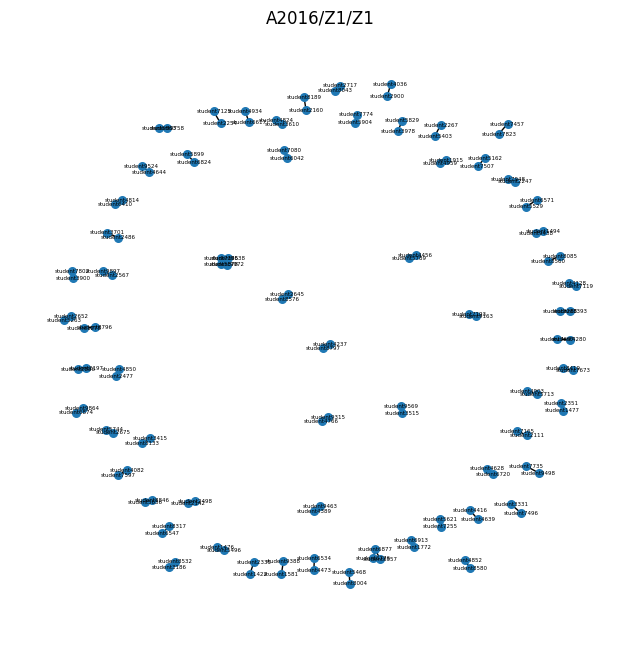

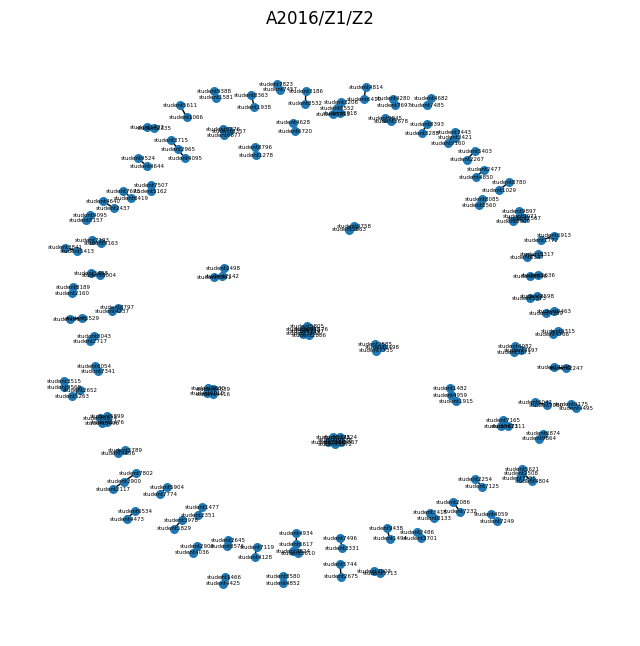

In [127]:
G = nx.Graph()
edge_df = pd.DataFrame(columns=['name','nr_edges', 'neighbors','assignment'])

df_99 = student_scores(df_filtered, 90)
uni = unique_students(df_99)

for path in progressbar(paths[:2]):
    if 'A2016' in path:
        new_df = filter_df(df_99, [], path, False)
        # print(len(unique_students(new_df)))
        a = new_df.Student_A.to_list()
        b = new_df.Student_B.to_list()
        edges = [(a[i],b[i]) for i in range(len(a))]
        G.add_edges_from(edges)

        nr_of_edges = []
        # for x in G.nodes():
        #     nr_of_edges.append([x,len(G.edges(x)),path])
        
        for stu in uni:
            try:
                G.edges(stu)
            except:
                nr_of_edges.append([stu, 0, [], path])
            else:
                stu_edges = [x[1] for x in G.edges(stu)]
                nr_of_edges.append([stu, len(stu_edges), stu_edges, path])

        edge_df = pd.concat([edge_df,pd.DataFrame(nr_of_edges, columns=['name','nr_edges','neighbors','assignment'])])
        # print(len(edges), len(new_df))
        plt.figure(figsize=(8,8),dpi=100)
        plt.title(path)
        nx.draw(G, node_size=30,font_size=4, with_labels=True)
        path = path.replace('/','-')
        # plt.savefig(path+".png", format='PNG')
        # print(len(G.nodes))

# print(max(b))

# G.add_nodes_from(set(b))
# G.add_edges_from(a)
# print(nx.draw(G))

In [191]:
# filter on percentage, course and replace student with s
percentage = 99
df_99 = student_scores(df_filtered, percentage)
df_99 = filter_df(df_99, [], '', False)
df_99.Student_A = df_99.Student_A.str.replace('student','s')
df_99.Student_B = df_99.Student_B.str.replace('student','s')
uni = unique_students(df_99)

# print_df(df_99[df_99.assignment.str.contains('Z1/Z1')])

In [450]:
# make dataframe with student, number of edges they have, who the edge is with, and what assignment it is for
def make_edge_df(df, uni):
    edge_df = pd.DataFrame(columns=['name','nr_edges', 'neighbors','assignment'])

    for path in progressbar(paths):
        G = nx.Graph()
        new_df = filter_df(df, [], path, False)
        
        a = new_df.Student_A.to_list()
        b = new_df.Student_B.to_list()
        # print(path, a.count('s4420'), b.count('s4420'))
        edges = [(a[i],b[i]) for i in range(len(a))]
        # print(edges)
        G.add_edges_from(edges)

        nr_of_edges = []
        # for x in G.nodes():
        #     nr_of_edges.append([x,len(G.edges(x)),path])
        
        for stu in uni:
            try:
                G.edges(stu)
            except:
                nr_of_edges.append([stu, 0, [], path])
            else:
                stu_edges = [x[1] for x in G.edges(stu)]
                nr_of_edges.append([stu, len(stu_edges), stu_edges, path])
                # if stu == 's4420':
                #     print([stu, len(stu_edges), stu_edges, path])

        edge_df = pd.concat([edge_df,pd.DataFrame(nr_of_edges, columns=['name','nr_edges','neighbors','assignment'])])
        
        # plt.figure(figsize=(6,6),dpi=200)
        # plt.title(path)
        # nx.draw(G, node_size=30,font_size=4, with_labels=True)
        path = path.replace('/','-')
        # plt.savefig(path+".png", format='PNG')
    return edge_df

edge_df = make_edge_df(idf_df, uni_idf)

18/18


In [229]:
filter_df(df_99, ['s4155'], '', False)

ids Student_A Student_B          idf compared_ngrams  \
594  (108, 192)     s2821     s4155  4759.330832              43   
596  (192, 448)     s4155     s8295  4759.330832              43   
96    (73, 151)     s2526     s4155  8144.380459              71   
177  (112, 151)     s3301     s4155  8144.380459              71   
291  (126, 151)     s3567     s4155  8144.380459              71   
464  (151, 167)     s4155     s4420  8144.380459              71   
466  (151, 184)     s4155     s4661  8144.380459              71   

    A_total_compared B_total_compared   assignment percentage_a percentage_b  
594               43               43  A2016/Z1/Z4        100.0        100.0  
596               43               43  A2016/Z1/Z4        100.0        100.0  
96                71               71  A2016/Z3/Z3        100.0        100.0  
177               71               71  A2016/Z3/Z3        100.0        100.0  
291               71               71  A2016/Z3/Z3        100.0        100.0  
464               71               71  A2016/Z3/Z3        100.0        100.0  
466               71               71  A2016/Z3/Z3        100.0        100.0

In [240]:
print_df(edge_df.sort_values('nr_edges', ascending=False))

      name nr_edges                                          neighbors   assignment
165  s3483       67  [s8319, s7799, s3108, s5867, s7298, s6720, s46...  A2016/Z1/Z1
326  s5659       60  [s6516, s4473, s9476, s7341, s9438, s7673, s67...  A2016/Z2/Z4
393  s6720       58  [s4628, s8189, s2160, s3717, s3483, s6728, s89...  A2016/Z1/Z1
249  s4628       58  [s6720, s2160, s8189, s3717, s3483, s6728, s89...  A2016/Z1/Z1
184  s3717       56  [s7888, s6227, s2035, s6507, s6720, s4628, s81...  A2016/Z1/Z1
256  s4665       55  [s8067, s6723, s6547, s9141, s7001, s4973, s76...  A2016/Z2/Z4
42   s1616       51  [s7665, s7888, s6364, s8864, s4587, s6507, s85...  A2016/Z1/Z1
125  s2939       51  [s5741, s8774, s6364, s8067, s2267, s5403, s14...  A2016/Z1/Z1
246  s4587       51  [s2953, s2664, s9358, s7888, s8532, s3186, s78...  A2016/Z1/Z1
383  s6594       44  [s3306, s7173, s4682, s5468, s8004, s2340, s44...  A2016/Z2/Z2
82   s2364       44  [s7507, s5162, s3717, s5744, s2675, s3978, s58...  A201

In [243]:
filter_df(idf_df, ['s3483'], 'Z1/Z1', False)

ids Student_A Student_B          idf compared_ngrams  \
13765  (154, 454)     s3483     s8319  3020.716995              44   
13745  (154, 415)     s3483     s7799  1824.845026              35   
12063  (125, 154)     s3108     s3483  1785.842368              36   
52309  (154, 313)     s3483     s5867  1628.140244              34   
52349  (154, 390)     s3483     s7298  1627.878730              33   
...           ...       ...       ...          ...             ...   
52334  (154, 369)     s3483     s6913   687.494993              25   
33100   (45, 154)     s1772     s3483   687.494993              25   
13754  (154, 435)     s3483     s8089   686.615667              26   
13697  (154, 280)     s3483     s5420   686.022312              25   
52330  (154, 355)     s3483     s6656   681.916833              24   

      A_total_compared B_total_compared   assignment percentage_a percentage_b  
13765               76               97  A2016/Z1/Z1    57.894737    45.360825  
13745               76               75  A2016/Z1/Z1    46.052632    46.666667  
12063              107               76  A2016/Z1/Z1     33.64486    47.368421  
52309               76               89  A2016/Z1/Z1    44.736842    38.202247  
52349               76               90  A2016/Z1/Z1    43.421053    36.666667  
...                ...              ...          ...          ...          ...  
52334               76               91  A2016/Z1/Z1    32.894737    27.472527  
33100               91               76  A2016/Z1/Z1    27.472527    32.894737  
13754               76               71  A2016/Z1/Z1    34.210526    36.619718  
13697               76               79  A2016/Z1/Z1    32.894737     31.64557  
52330               76               88  A2016/Z1/Z1    31.578947    27.272727  

[67 rows x 10 columns]

18/18


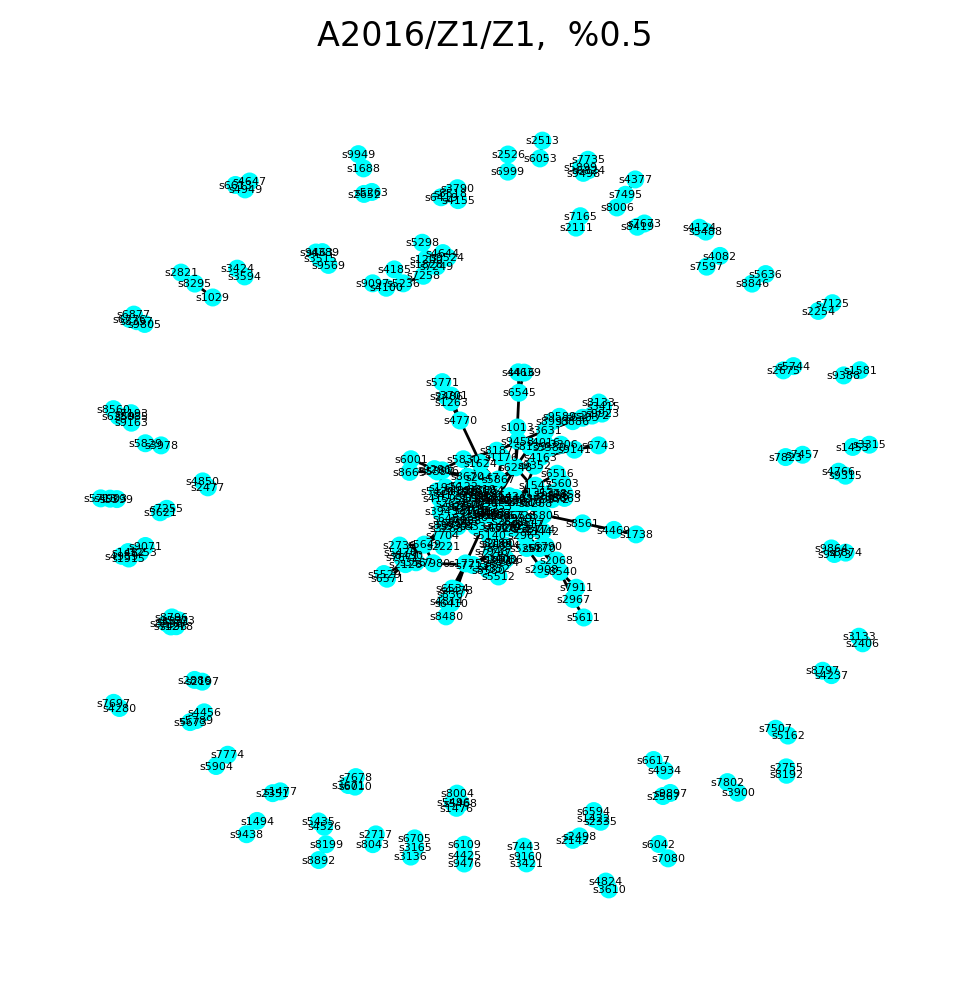

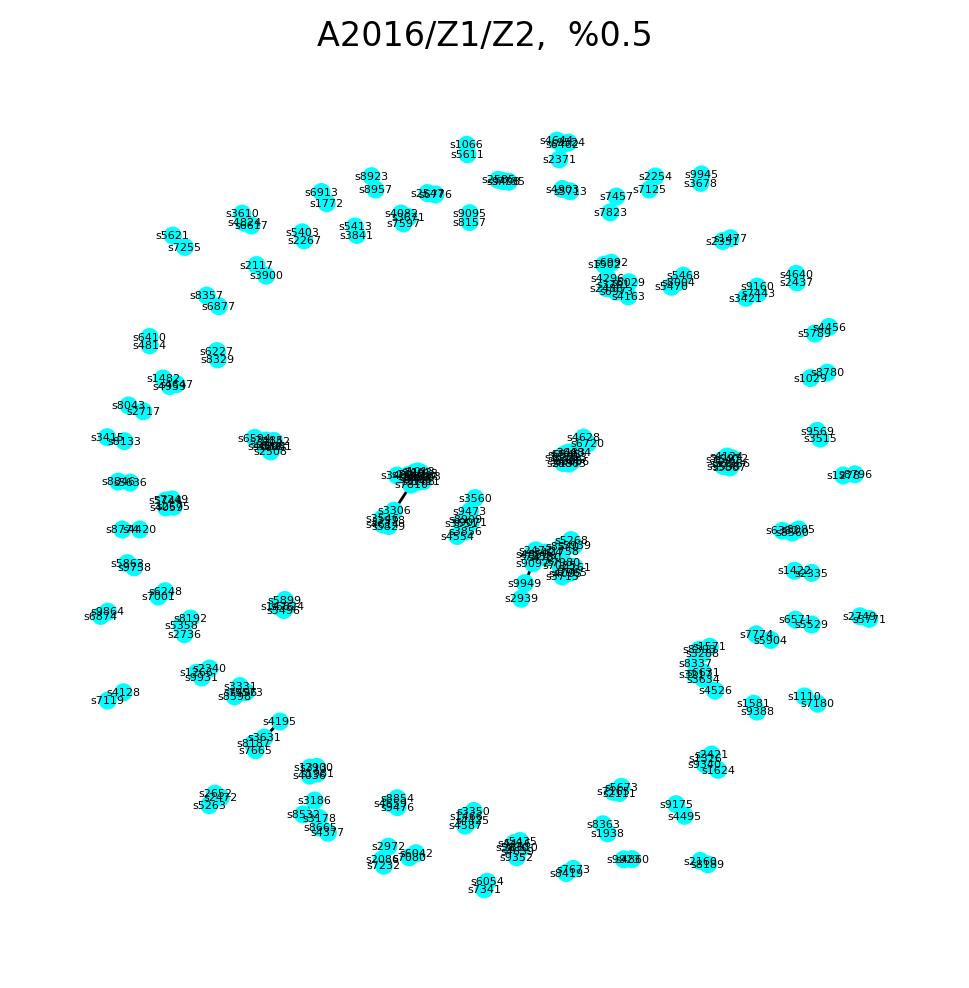

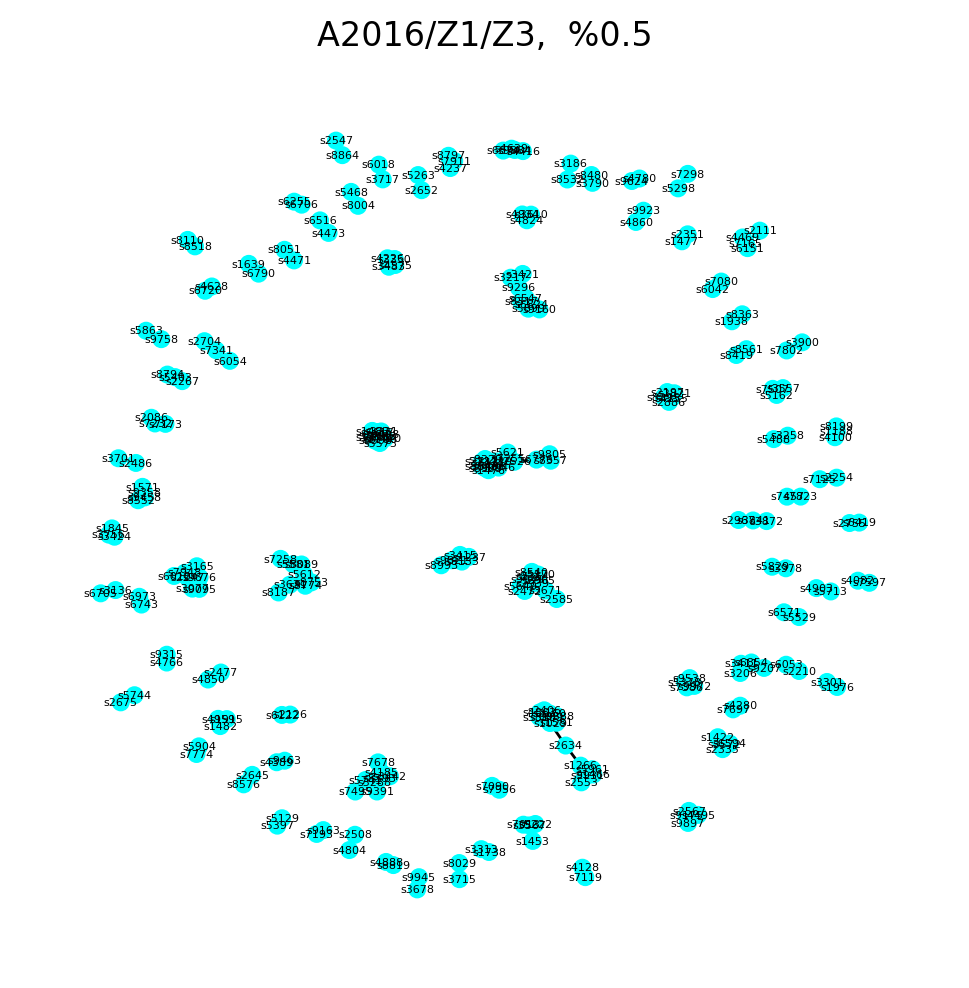

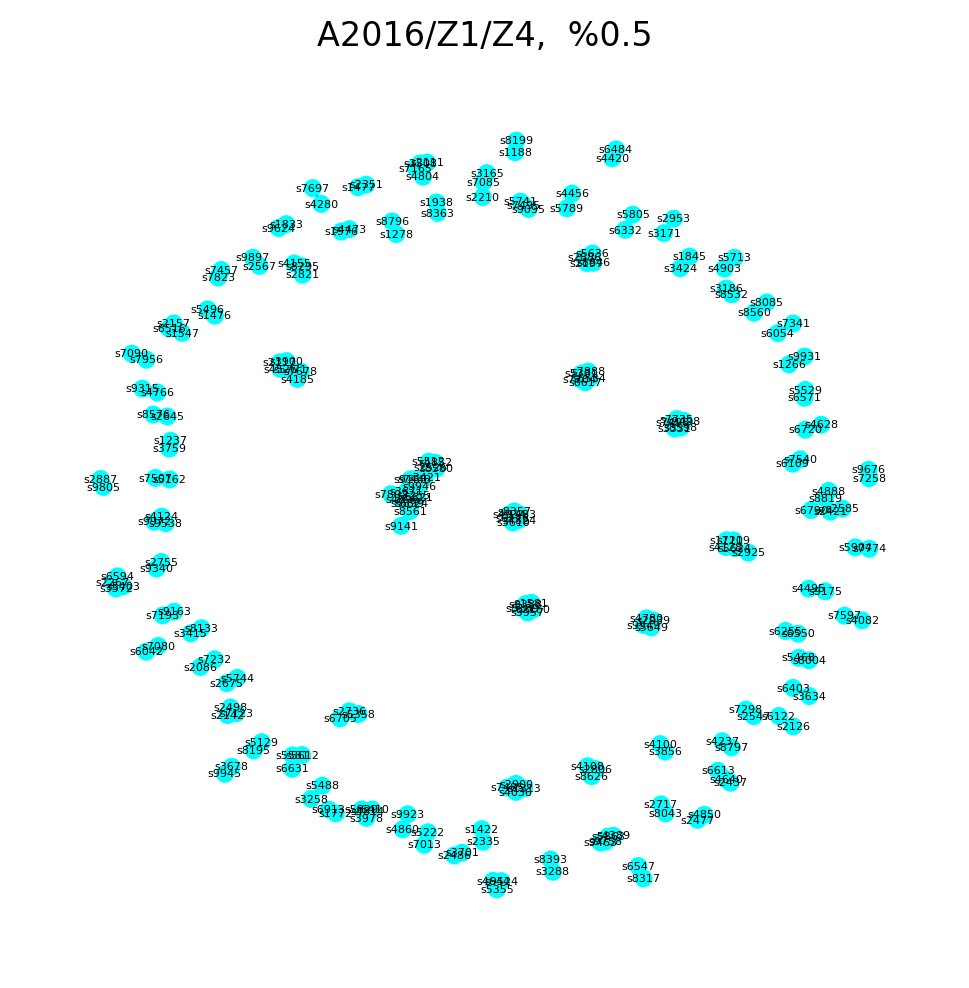

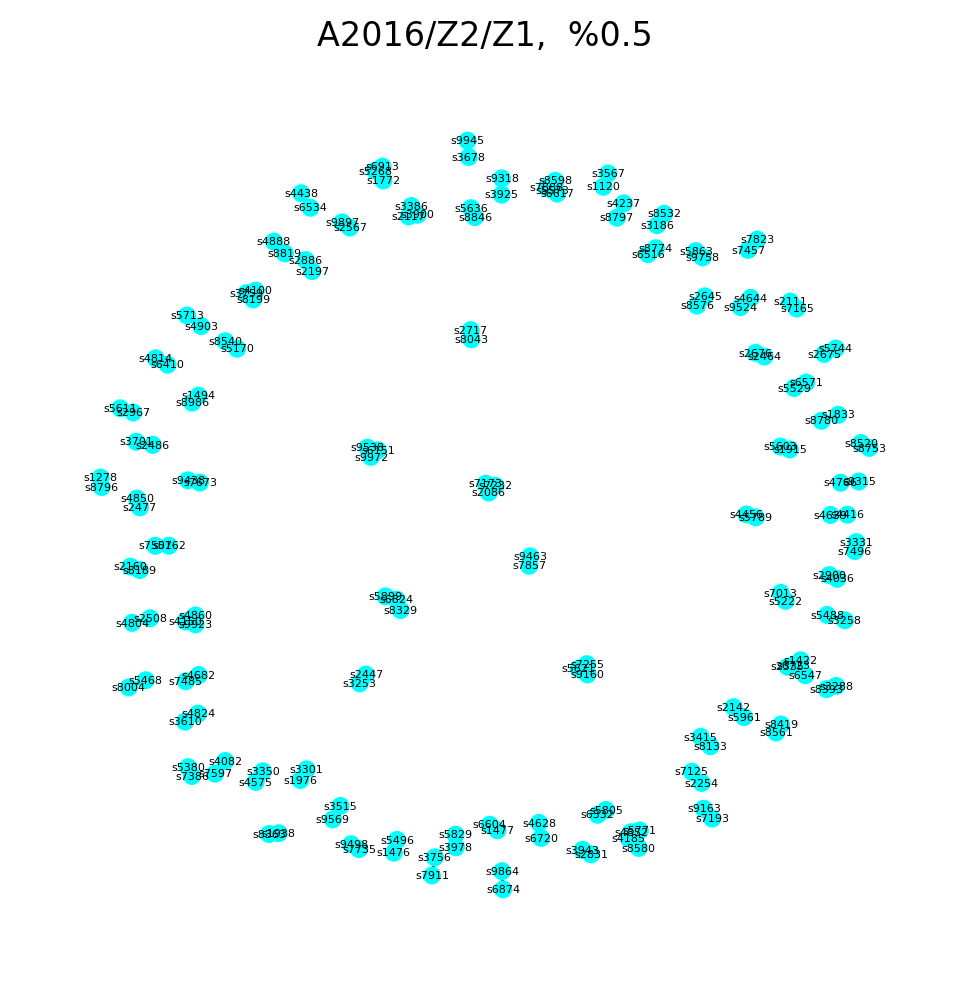

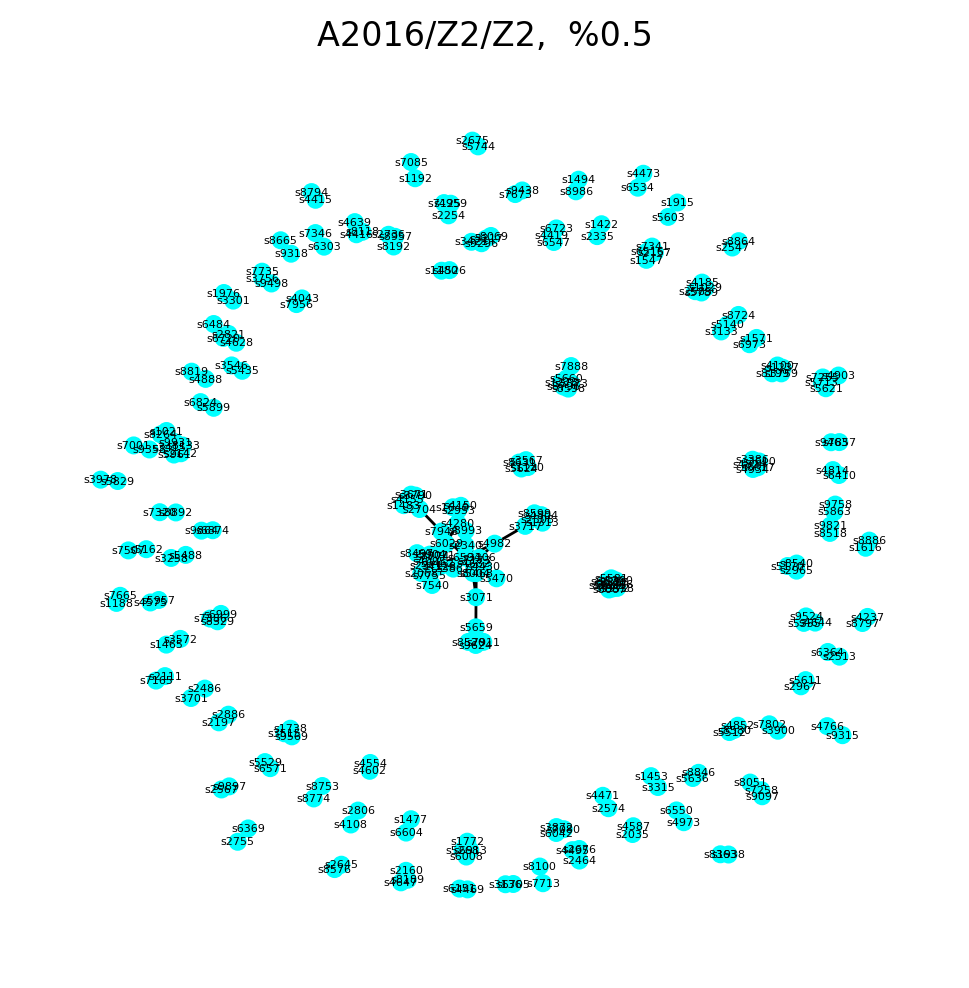

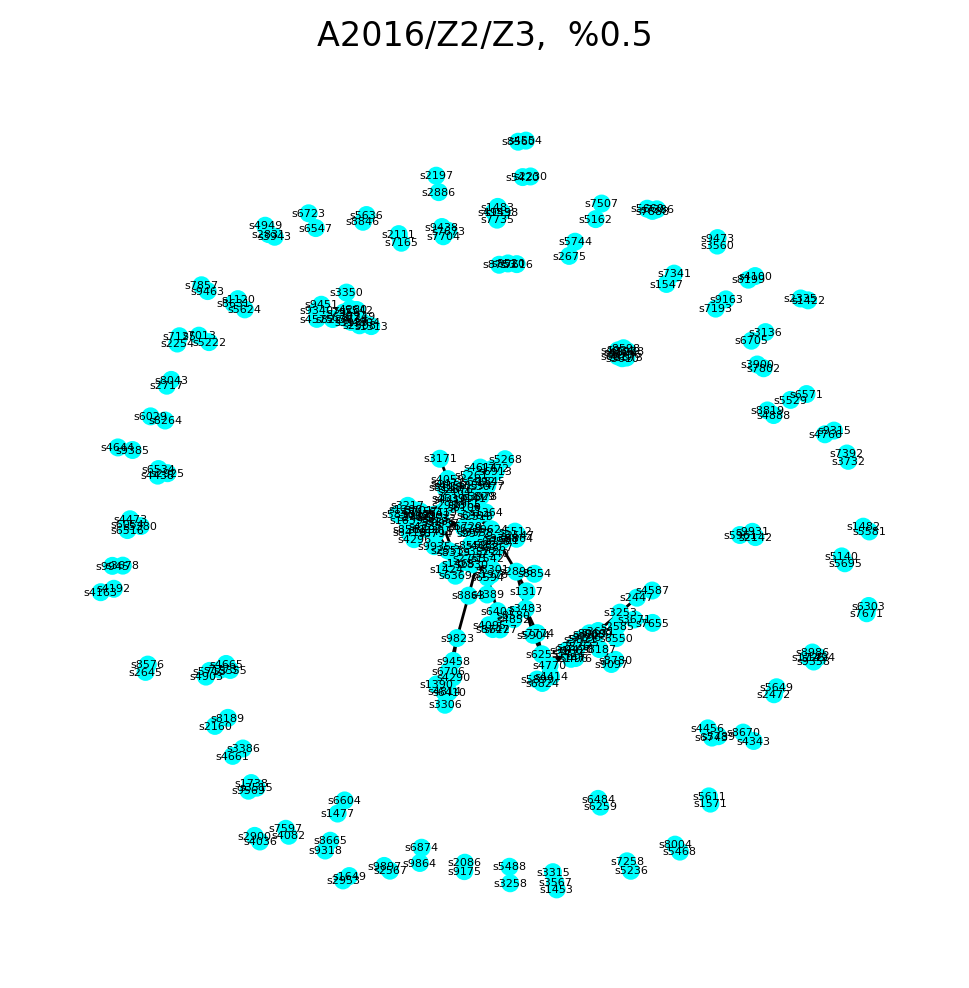

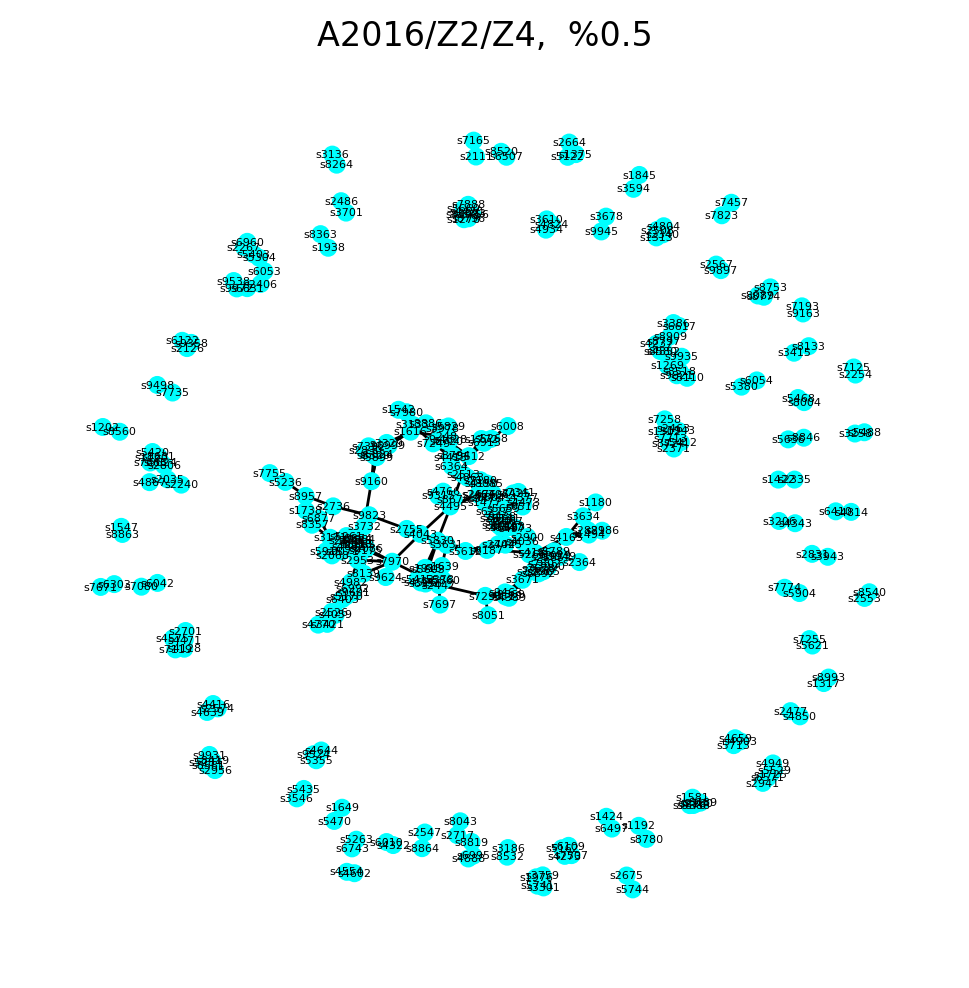

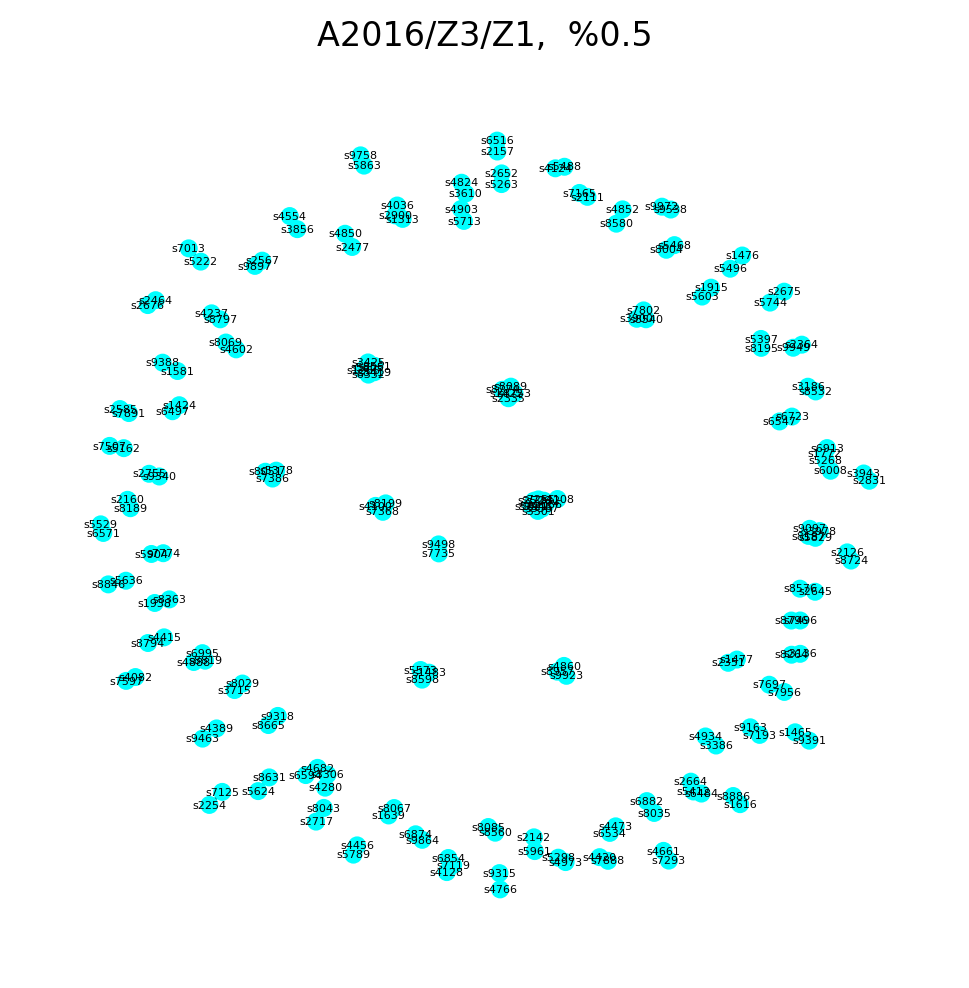

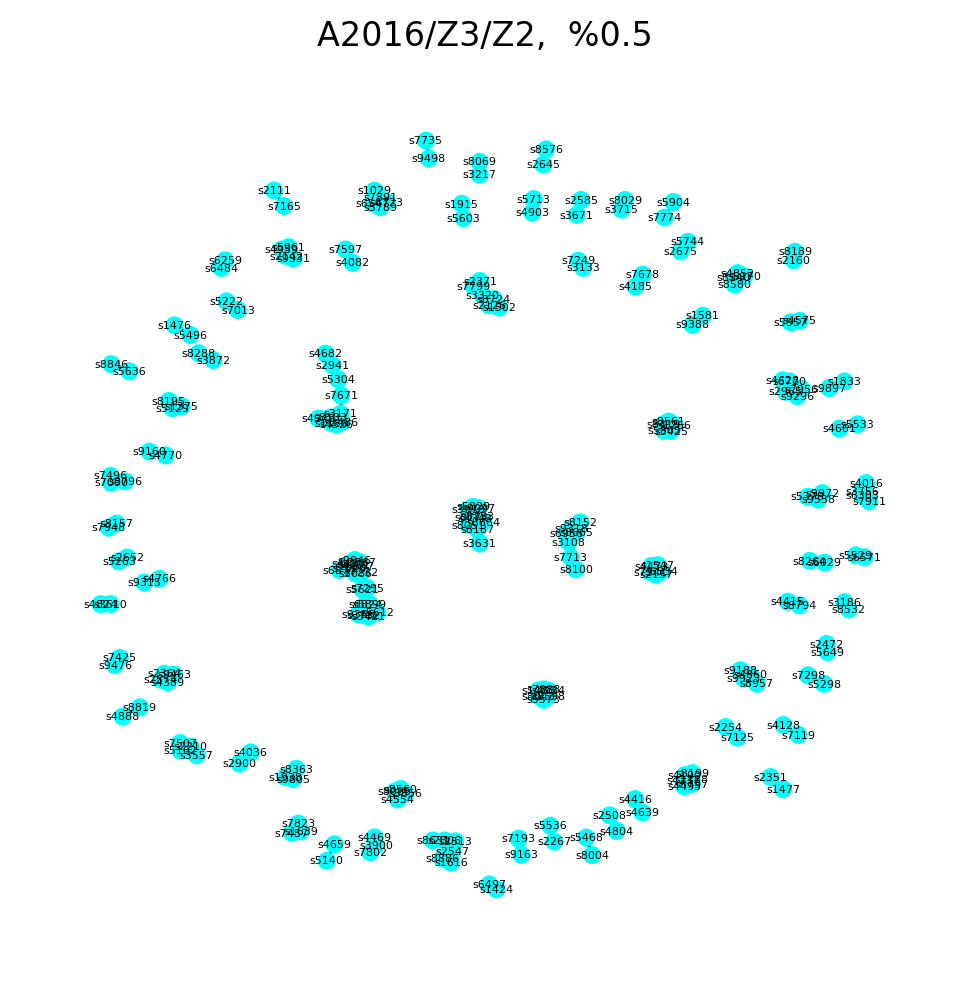

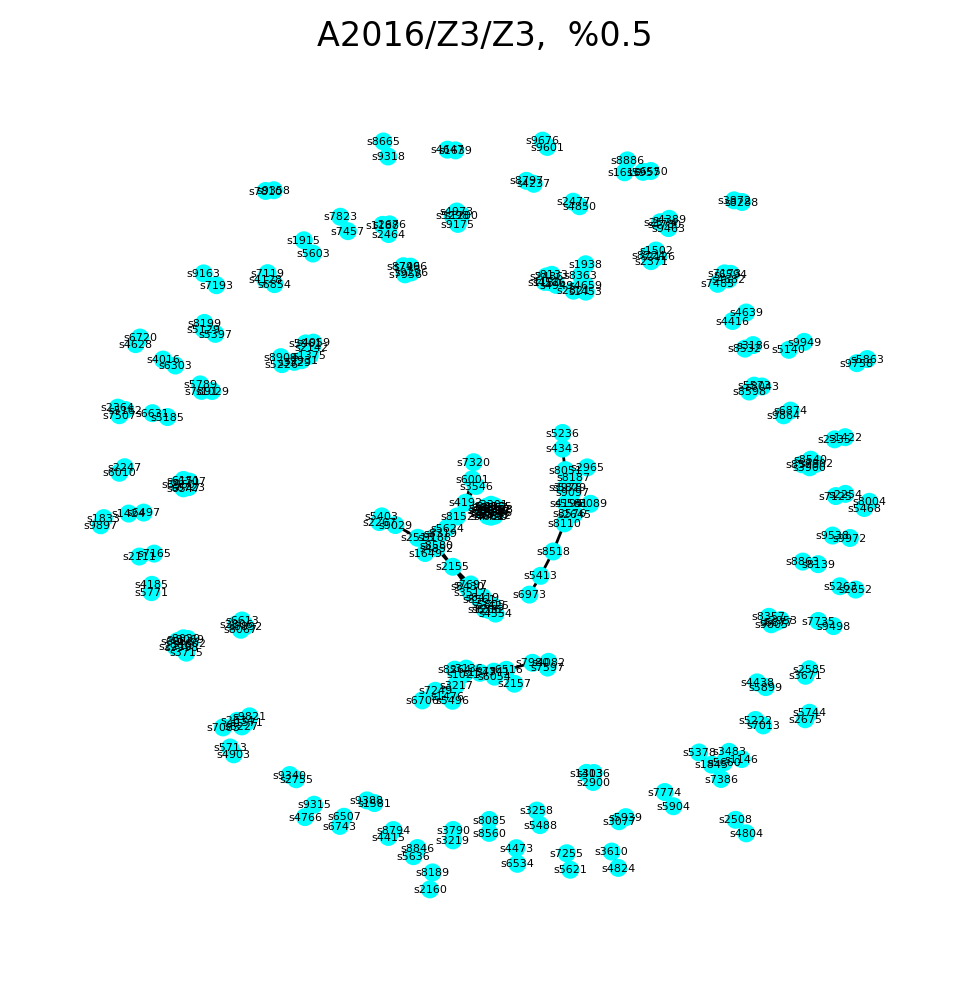

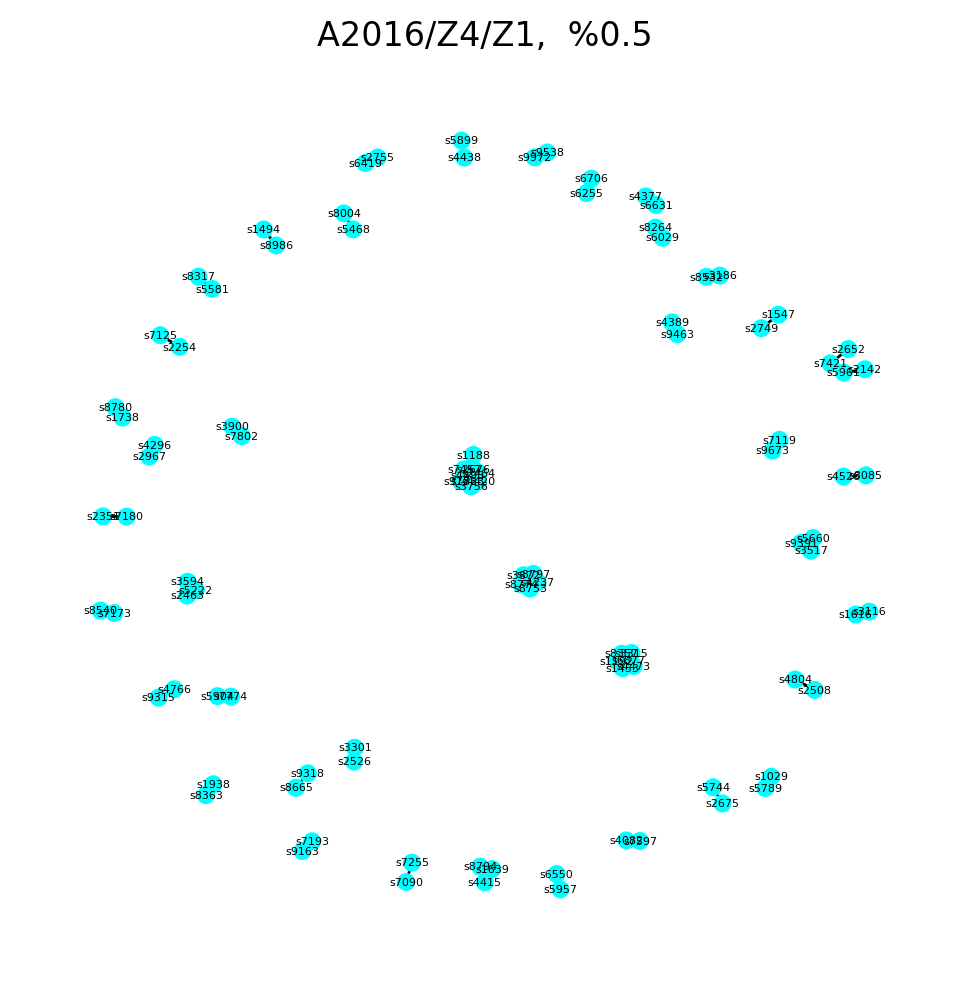

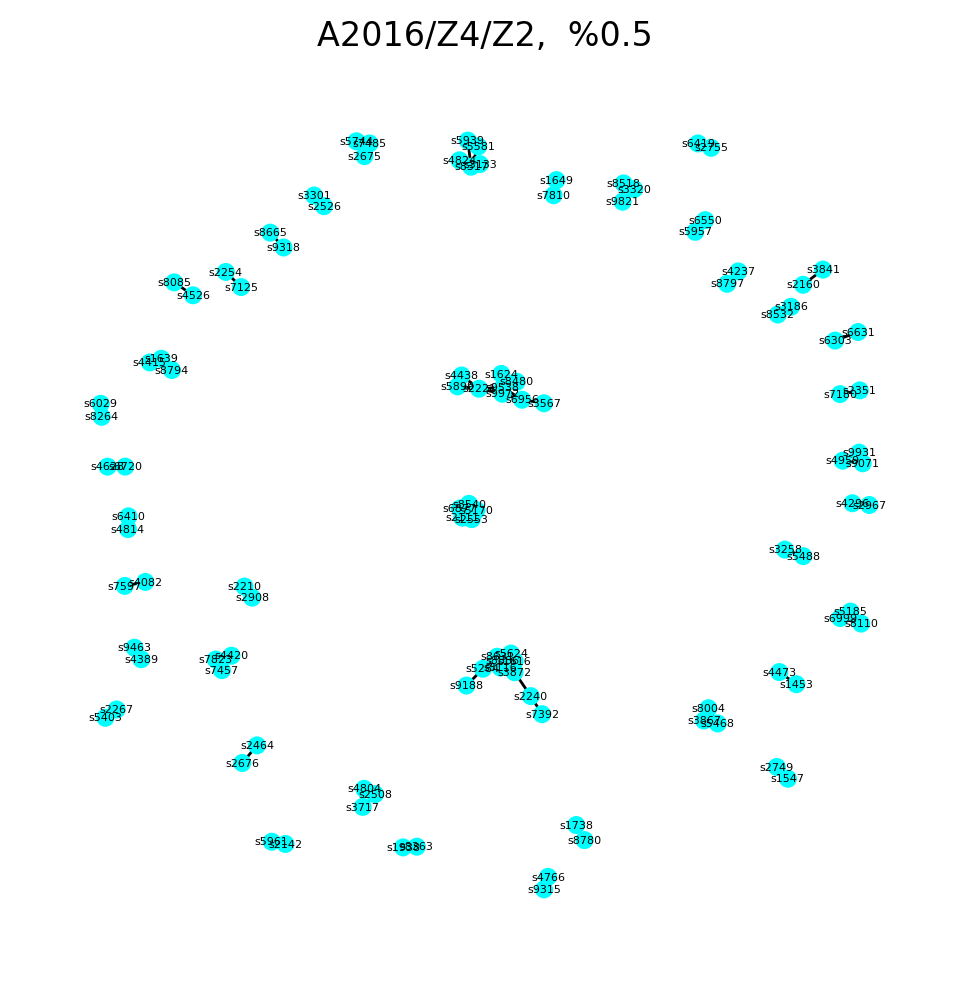

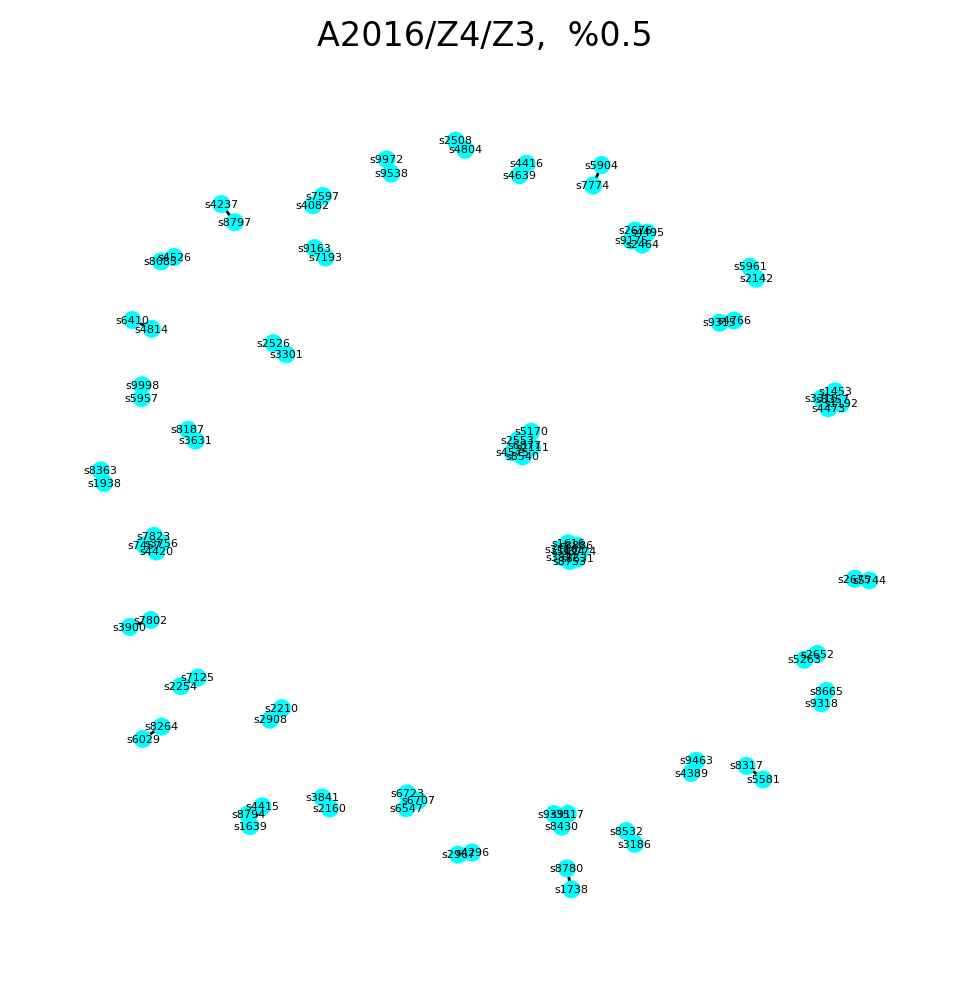

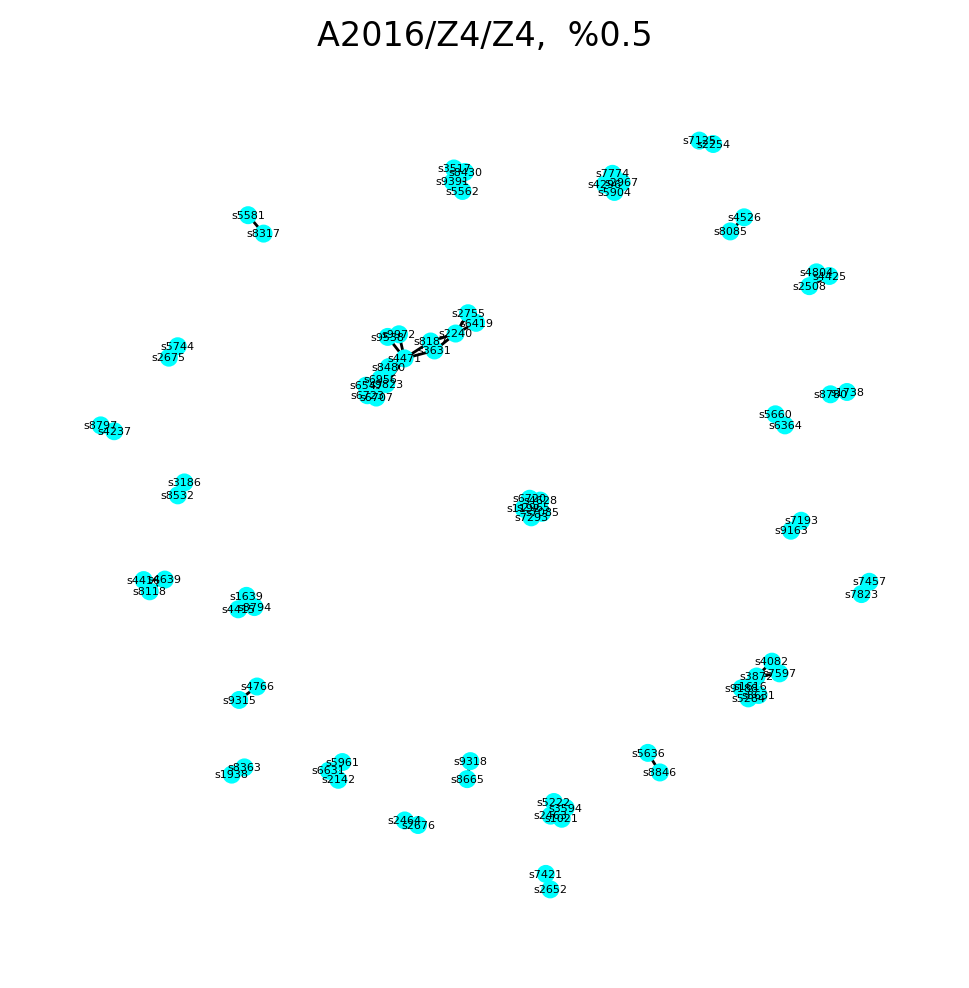

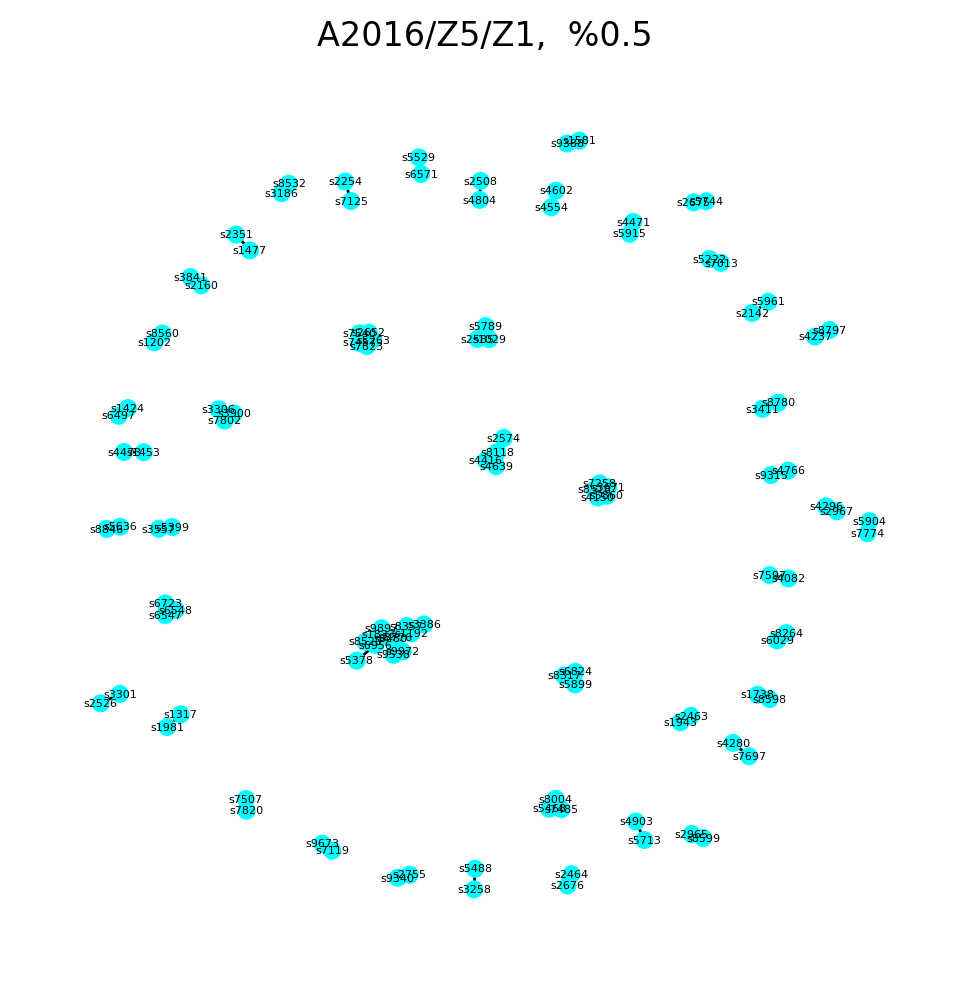

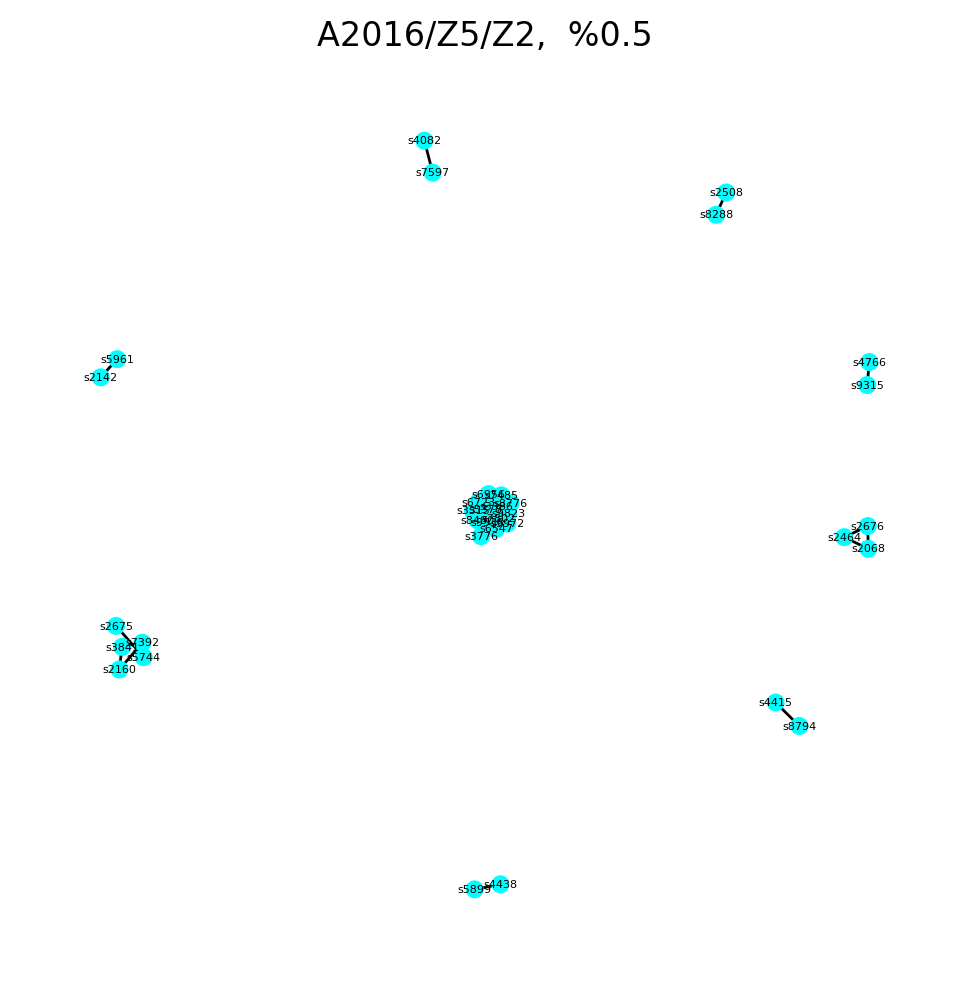

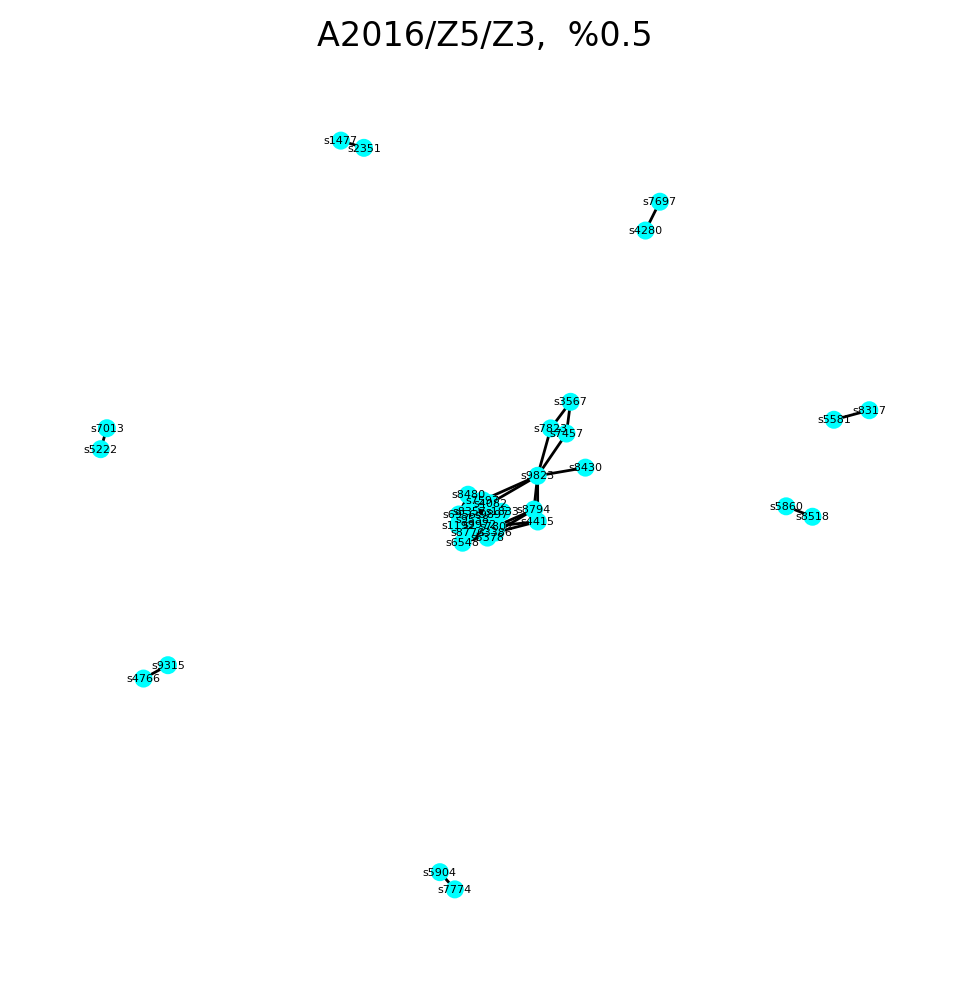

In [364]:
# draw network graphs for each assignment
def draw_graphs(df):
    # uni_limit = set(edge_df.name.to_list())
    # print(len(uni_limit))

    for path in progressbar(paths):
        H = nx.Graph()
        new_df = filter_df(df, [], path, False)

        a = new_df.Student_A.to_list()
        b = new_df.Student_B.to_list()
        edges = [(a[i],b[i]) for i in range(len(a))]
        H.add_edges_from(edges, length=100)

        # print(path, a.count('s5378'), b.count('s5378'))
        

        color_map = []
        for node in H.nodes():
        #     # color_map.append('red')
        #     if node in uni_limit:
        #         color_map.append('red')
        #     else:
            color_map.append('cyan')
        # print(len(H.nodes()), len(color_map))
        
        plt.figure(figsize=(6,6),dpi=200)
        plt.title(path+",  %"+str(percentage))
        pos = nx.spring_layout(H)
        nx.draw(H, pos, node_size=30,font_size=4, with_labels=True, node_color=color_map)
        path = path.replace('/','-')
        plt.savefig(path+".png", format='PNG')

draw_graphs(idf_df)
        

In [195]:
# a = [(1,2),(1,3),(2,3),(3,4),(5,6),(5,7),(6,7),(1,5)]
# b = [1,2,2,3,3,3,4,4,4,4,5,5,5,6,6,7,7,7,7,7,7,7,7,7]
# c = ['red','red','red','red','red','red']

# # print(max(b))

# import networkx as nx

# G = nx.Graph()

# G.add_nodes_from(set(b))
# G.add_edges_from(a)
# print(nx.draw(G, node_color=c))

In [451]:
stu_edge_nr = []
stu_neighbors = {}
stu_neighbors_counter = []

for stu in uni_idf:
    stu_edge_nr.append([stu, list(edge_df[edge_df['name'] == stu].nr_edges.to_list())])
    neighbors_list = edge_df[edge_df['name'] == stu].neighbors.to_list()
    flat_list = [student for list in neighbors_list for student in list]
    stu_neighbors[stu] = stu_neighbors.get(stu, []) + flat_list

for stu, value in stu_neighbors.items():
    stu_neighbors_counter.append([stu, [x for x in Counter(value).items()]])

stu_neighbors_counter = sorted(stu_neighbors_counter, key = lambda student: len(student[1]), reverse=True)
stu_neighbors_counter

[['s2965',
  [('s8067', 2),
   ('s6790', 2),
   ('s5170', 5),
   ('s2068', 2),
   ('s5805', 1),
   ('s3790', 1),
   ('s8540', 4),
   ('s1616', 1),
   ('s4587', 1),
   ('s6364', 2),
   ('s6547', 1),
   ('s8317', 1),
   ('s6484', 2),
   ('s4628', 5),
   ('s6720', 5),
   ('s8670', 1),
   ('s5830', 2),
   ('s2664', 1),
   ('s2939', 2),
   ('s7888', 1),
   ('s1313', 1),
   ('s3217', 3),
   ('s6507', 1),
   ('s7665', 1),
   ('s5741', 1),
   ('s7810', 3),
   ('s3631', 1),
   ('s8187', 2),
   ('s8864', 1),
   ('s3560', 1),
   ('s7911', 1),
   ('s1976', 2),
   ('s4128', 1),
   ('s7119', 1),
   ('s3717', 2),
   ('s2831', 1),
   ('s1725', 1),
   ('s2526', 1),
   ('s4095', 2),
   ('s3715', 2),
   ('s7085', 2),
   ('s7980', 3),
   ('s4161', 1),
   ('s1758', 1),
   ('s5268', 1),
   ('s5939', 1),
   ('s4682', 3),
   ('s6357', 2),
   ('s7485', 2),
   ('s3306', 1),
   ('s3178', 1),
   ('s4469', 2),
   ('s8665', 1),
   ('s4377', 2),
   ('s3116', 1),
   ('s3406', 2),
   ('s1649', 1),
   ('s6550', 1),
   

In [454]:
stu_edge_nr_sorted = sorted(stu_edge_nr, key=itemgetter(1), reverse=True)
# print(len(stu_edge_nr_sorted))
stu_edge_nr_sorted

new_list = stu_edge_nr.copy()

new_list.sort(key= lambda x: (x[1].count(0), sum(x[1])))
new_list

[['s9972', [7, 21, 7, 2, 3, 29, 17, 7, 5, 4, 3, 4, 14, 8, 8, 7, 13, 14]],
 ['s9538', [7, 21, 7, 2, 3, 30, 17, 7, 5, 4, 3, 4, 14, 8, 8, 7, 13, 14]],
 ['s4766', [3, 0, 3, 1, 3, 17, 1, 13, 4, 2, 2, 1, 2, 1, 1, 1, 1, 1]],
 ['s9315', [3, 0, 3, 1, 3, 17, 1, 15, 4, 2, 2, 1, 2, 1, 1, 1, 1, 1]],
 ['s2675', [1, 14, 2, 3, 7, 26, 3, 3, 7, 6, 8, 1, 4, 1, 1, 2, 1, 0]],
 ['s5744', [1, 14, 2, 3, 7, 26, 3, 3, 7, 6, 8, 1, 4, 1, 1, 2, 1, 0]],
 ['s2142', [8, 22, 0, 18, 5, 3, 6, 13, 8, 3, 14, 1, 1, 3, 2, 1, 1, 0]],
 ['s8780', [3, 21, 5, 2, 11, 4, 16, 7, 11, 17, 2, 8, 3, 3, 1, 1, 0, 0]],
 ['s5961', [0, 22, 31, 5, 5, 3, 6, 13, 8, 3, 14, 1, 1, 3, 2, 1, 1, 0]],
 ['s4082', [13, 19, 5, 2, 33, 0, 3, 0, 10, 3, 15, 1, 13, 1, 2, 1, 1, 12]],
 ['s7597', [13, 19, 5, 2, 33, 0, 3, 0, 10, 3, 15, 1, 13, 1, 2, 1, 1, 12]],
 ['s7802', [3, 23, 15, 27, 2, 10, 3, 12, 7, 3, 4, 8, 0, 10, 0, 10, 13, 13]],
 ['s4415', [20, 6, 0, 17, 23, 1, 62, 23, 4, 3, 12, 4, 6, 2, 2, 0, 1, 4]],
 ['s7774', [2, 6, 1, 1, 30, 60, 43, 14, 30, 2, 3, 10, 

18/18


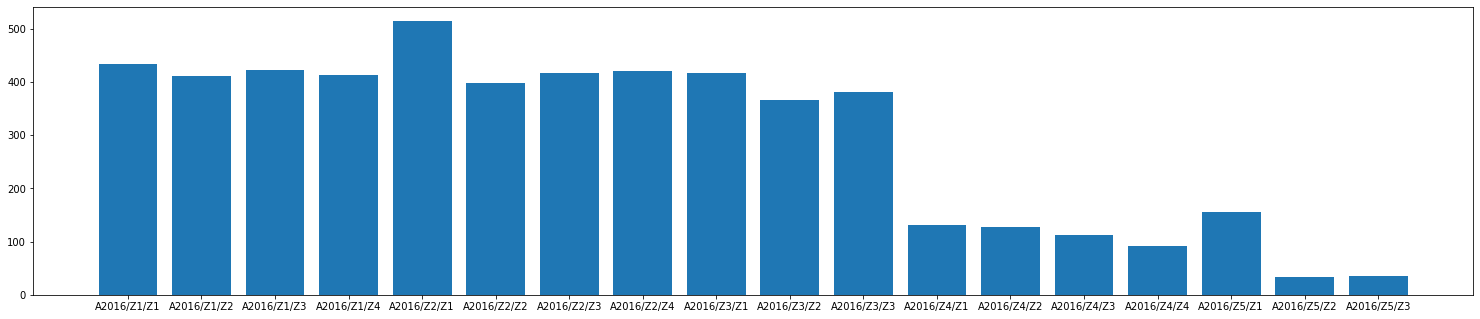

In [455]:

nr_submitted = []
for i in progressbar(range(len(new_list[0][1]))):
    aggregate = 0
    for student in new_list:
        # print(i)
        if student[1][i] != 0:
            aggregate +=1
        else:
            aggregate += 0
    nr_submitted.append(aggregate)

# with idf_df which takes 1% of possible matches as top-n
fig = plt.figure(figsize=(20,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(paths,nr_submitted)
plt.show()

In [319]:
for student in progressbar(stu_edge_nr_sorted):
    weeks = np.array(student[1])
    stu = student[0]
    missing = np.where(weeks == 0)[0]

    for miss in missing:
        ass = paths[miss]
        rows_filter = len(filter_df(df_filtered, [stu], ass, False))
        rows_comp = len(filter_df(complete_df, [stu], ass, False))

        if rows_filter != 0 or rows_comp != 0:
            print(stu, ass, rows_filter, rows_comp)
        # print(rows)

602/602


In [370]:
new_df = filter_df(df_filtered, [], 'A2016', False)
# new_df.nlargest(round(len(new_df)/100), 'idf').round(0)

print('a2016 ', len(unique_students(idf_df)))
print('1% ',len(unique_students(idf_df.nlargest(round(len(idf_df)*0.01), 'idf').round(0))))
print('0,5% ',len(unique_students(idf_df.nlargest(round(len(idf_df)*0.005), 'idf').round(0))))
print('idf ',len(unique_students(idf_df)))

a2016  573
1%  59
0,5%  40
idf  573


In [322]:
print(len(complete_df)-len(df_filtered))
pd.concat([complete_df,df_filtered]).drop_duplicates(keep=False)

185379


ids    Student_A    Student_B            idf compared_ngrams  \
0    (169, 541)  student3678  student9945    6225.448174              45   
94   (100, 109)  student2701  student2830      18.612020               2   
96    (88, 360)  student2526  student6743     514.428942              18   
116  (123, 149)  student3071  student3415     158.019947               8   
117  (123, 196)  student3071  student4124      13.245352               2   
..          ...          ...          ...            ...             ...   
99     (28, 39)  student5904  student7774  103910.961513             236   
135     (5, 11)  student1477  student2351  195164.026227             329   
159    (36, 41)  student7457  student7823  258200.593960             378   
170     (8, 25)  student1833  student5378    9664.065323              84   
175    (25, 56)  student5378  student9897    9664.065323              84   

    A_total_compared B_total_compared   assignment percentage_a percentage_b  
0                 45               45  A2016/Z1/Z1        100.0        100.0  
94                65               71  A2016/Z1/Z1     3.076923     2.816901  
96                94              100  A2016/Z1/Z1    19.148936         18.0  
116               63               68  A2016/Z1/Z1    12.698413    11.764706  
117               63               80  A2016/Z1/Z1     3.174603          2.5  
..               ...              ...          ...          ...          ...  
99               236              236  A2016/Z5/Z3        100.0        100.0  
135              329              329  A2016/Z5/Z3        100.0        100.0  
159              378              378  A2016/Z5/Z3        100.0        100.0  
170              365              315  A2016/Z5/Z3    23.013699    26.666667  
175              315              365  A2016/Z5/Z3    26.666667    23.013699  

[185545 rows x 10 columns]

In [402]:
print(len(idf_df[(idf_df['Student_A'] =='s9538') | (idf_df['Student_B'] =='s9538')]))
sum(edge_df[edge_df['name'] == 's9538'].nr_edges.to_list())
edge_df[edge_df['name'] == 's9538']
# filter_df(idf_df, ['s9538'], [], False)

82


name nr_edges                                          neighbors  \
552  s9538        7  [s9972, s5378, s7386, s5863, s9758, s7810, s1313]   
552  s9538        6         [s5867, s9972, s4124, s5378, s7386, s7540]   
552  s9538        3                              [s9972, s5378, s7386]   
552  s9538        2                                     [s9972, s4124]   
552  s9538        2                                     [s6151, s9972]   
552  s9538        9  [s8317, s5581, s9972, s3631, s8067, s2406, s86...   
552  s9538        8  [s9972, s6720, s4628, s2513, s6364, s4682, s35...   
552  s9538        2                                     [s9972, s6631]   
552  s9538        1                                            [s9972]   
552  s9538        2                                     [s9972, s5378]   
552  s9538        1                                            [s9972]   
552  s9538        1                                            [s9972]   
552  s9538        5                [s9972, s8480, s1624, s2221, s6956]   
552  s9538        1                                            [s9972]   
552  s9538        2                                     [s9972, s4471]   
552  s9538        3                              [s9972, s8480, s8776]   
552  s9538       13  [s6723, s9972, s3315, s6547, s5378, s7802, s33...   
552  s9538       14  [s9972, s7597, s4082, s6956, s6548, s8776, s11...   

      assignment  
552  A2016/Z1/Z1  
552  A2016/Z1/Z2  
552  A2016/Z1/Z3  
552  A2016/Z1/Z4  
552  A2016/Z2/Z1  
552  A2016/Z2/Z2  
552  A2016/Z2/Z3  
552  A2016/Z2/Z4  
552  A2016/Z3/Z1  
552  A2016/Z3/Z2  
552  A2016/Z3/Z3  
552  A2016/Z4/Z1  
552  A2016/Z4/Z2  
552  A2016/Z4/Z3  
552  A2016/Z4/Z4  
552  A2016/Z5/Z1  
552  A2016/Z5/Z2  
552  A2016/Z5/Z3

In [412]:
a,b,c = df_filtered.Student_A.to_list(), df_filtered.Student_B.to_list(), df_filtered.assignment.to_list()
fil = []
for x in range(len(a)):
    fil.append((a[x], b[x], c[x]))

a,b,c = idf_df.Student_A.to_list(), idf_df.Student_B.to_list(), idf_df.assignment.to_list()
idf = []
for x in range(len(a)):
    idf.append((a[x], b[x], c[x]))

removed = [elem for elem in fil if elem not in idf ]
print(len(fil), len(idf), len(removed))

759529 4321 759529


In [419]:
def students_from_txt(rows):
    temp_dict = {}
    class_name = ""

    for row in rows:
        if '-' not in row:
            for student in row.rstrip('\n').split(','):
                temp_dict[class_name].append(student)
        else:
            class_name = row[2:].rstrip('\n')
            temp_dict[class_name] = []
    set_values = set([value for values in temp_dict.values() for value in values])
    return temp_dict, set_values

code_rows = []
with open('../ground-truth-static-anon.txt') as f:
    code_rows = f.readlines()

oral_rows = []
with open('../ground-truth-dynamic-anon.txt') as f:
    oral_rows = f.readlines()

total_rows = []
with open('../ground-truth-anon.txt') as f:
    total_rows = f.readlines()

code = students_from_txt(code_rows)
code_plag, set_code_plag = code[0], code[1]

oral = students_from_txt(oral_rows)
oral_plag, set_oral_plag = oral[0], oral[1]

total = students_from_txt(total_rows)
total_plag, set_total_plag = total[0], total[1]

In [428]:
for ass in progressbar(sorted(set(df_all.assignment.to_list()))):
    df = df_all[df_all['assignment'] == ass]
    len_normal = len(unique_students(df))
    len_99 = len(unique_students(student_scores(df, 90)))
    print(ass)
    print(len_normal, len_99, len_99/len_normal*100)
    print("")

A2016/Z1/Z1
475 131 27.57894736842105

A2016/Z1/Z2
445 155 34.831460674157306

A2016/Z1/Z3
456 154 33.771929824561404

A2016/Z1/Z4
504 153 30.357142857142854

A2016/Z2/Z1
559 150 26.833631484794275

A2016/Z2/Z2
451 142 31.48558758314856

A2016/Z2/Z3
476 157 32.983193277310924

A2016/Z2/Z4
462 161 34.84848484848485

A2016/Z3/Z1
442 140 31.674208144796378

A2016/Z3/Z2
401 142 35.41147132169576

A2016/Z3/Z3
417 153 36.69064748201439

A2016/Z4/Z1
173 93 53.75722543352601

A2016/Z4/Z2
152 79 51.973684210526315

A2016/Z4/Z3
140 83 59.285714285714285

A2016/Z4/Z4
108 63 58.333333333333336

A2016/Z5/Z1
190 91 47.89473684210526

A2016/Z5/Z2
48 27 56.25

A2016/Z5/Z3
48 28 58.333333333333336

A2017/Z1/Z1
650 601 92.46153846153847

A2017/Z1/Z2
683 647 94.72913616398243

A2017/Z1/Z3
694 651 93.80403458213257

A2017/Z1/Z4
791 754 95.32237673830595

A2017/Z2/Z1
666 638 95.7957957957958

A2017/Z2/Z2
563 548 97.33570159857904

A2017/Z2/Z3
647 627 96.90880989180835

A2017/Z2/Z4
527 519 98.4819734345351


In [2]:
complete_df = pd.read_pickle('complete_dataframe')
df_filtered = pd.read_pickle('std_filtered_dataframe')
df_all = complete_df.copy()

for ass in progressbar(sorted(set(df_all.assignment.to_list()))):
    df = df_all[df_all['assignment'] == ass]
    len_normal = len(unique_students(df))
    len_99 = len(unique_students(student_scores(df, 90)))
    print(ass)
    print(len_normal, len_99, len_99/len_normal*100)
    print("")

A2016/Z1/Z1
546 149 27.28937728937729

A2016/Z1/Z2
546 221 40.476190476190474

A2016/Z1/Z3
519 177 34.104046242774565

A2016/Z1/Z4
539 168 31.16883116883117

A2016/Z2/Z1
565 152 26.902654867256636

A2016/Z2/Z2
532 172 32.33082706766917

A2016/Z2/Z3
531 171 32.20338983050847

A2016/Z2/Z4
508 176 34.645669291338585

A2016/Z3/Z1
501 160 31.936127744510976

A2016/Z3/Z2
438 152 34.70319634703196

A2016/Z3/Z3
441 159 36.054421768707485

A2016/Z4/Z1
197 99 50.25380710659898

A2016/Z4/Z2
179 91 50.83798882681564

A2016/Z4/Z3
154 91 59.09090909090909

A2016/Z4/Z4
124 74 59.67741935483871

A2016/Z5/Z1
222 107 48.1981981981982

A2016/Z5/Z2
53 29 54.71698113207547

A2016/Z5/Z3
58 30 51.724137931034484

A2017/Z1/Z1
718 668 93.03621169916435

A2017/Z1/Z2
741 699 94.33198380566802

A2017/Z1/Z3
757 710 93.79128137384413

A2017/Z1/Z4
819 779 95.1159951159951

A2017/Z2/Z1
749 718 95.86114819759679

A2017/Z2/Z2
602 583 96.843853820598

A2017/Z2/Z3
682 662 97.0674486803519

A2017/Z2/Z4
576 564 97.91666666